## ANALISI PROB DA CATALOGO GSEP INIZIALE

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import math 

# Caricare file GSEP_List.csv

file_path = 'gsep_catalog/GSEP_List.csv'

df = pd.read_csv(file_path)
df.head()

#Converti timestamp in datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df["year"] = df["timestamp"].dt.year

print(df.shape)
df.head()


(433, 49)


,sep_index,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,...,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag,year
0,gsep_001,psep_012,NaN,1986-02-04 09:25:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,1986-02-03 21:25:00,1986-02-04 17:45:00,0,1986
1,gsep_002,psep_013,NaN,1986-02-05 17:50:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,1986-02-05 05:50:00,1986-02-06 08:35:00,0,1986
2,gsep_003,psep_014,NaN,1986-02-06 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1,S,NaN,Spike,NaN,AR from LMSAL-HEK,1986-02-05 23:00:00,1986-02-07 13:25:00,1,1986
3,gsep_004,psep_015,NaN,1986-02-07 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0,S,Taken by 6,NaN,NaN,AR from LMSAL-HEK,1986-02-07 01:00:00,1986-02-08 22:20:00,1,1986
4,gsep_005,psep_016,NaN,1986-02-10 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,0,S,NaN,Spike,NaN,AR from LMSAL-HEK,1986-02-10 09:00:00,1986-02-12 06:00:00,0,1986


In [ ]:
# Colonne importanti da salvare 
# timestamp (inizio evento)
# noaa_pf10MeV  picco flusso >10 MeV
#noaa-sep_flag  1 se evento supera soglia >10pfu 
#fluence_gt10MeV o fluence_gt30MeV  fluenza integrata






# STRONG SEP EVENT

In [133]:
threshold_intense = 100  # pfu

strong_SEP = df[(df["noaa-sep_flag"] == 1) & (df["noaa_pf10MeV"] >= threshold_intense)].copy()
print(f"Numero di eventi SEP intensi (>={threshold_intense} pfu): {len(strong_SEP)}")

def in_range(t, start, end):
    return (t >= start) & (t < end)

SC22_start = datetime(1986, 9, 1)
SC22_end = datetime(1996, 8, 1)

SC23_start = SC22_end
SC23_end = datetime(2008, 12, 1)

SC24_start = SC23_end
SC24_end = datetime(2019, 12, 31)


STRONG_SC22 = strong_SEP[in_range(strong_SEP['timestamp'], SC22_start, SC22_end)]
STRONG_SC23 = strong_SEP[in_range(strong_SEP['timestamp'], SC23_start, SC23_end)]
STRONG_SC24 = strong_SEP[in_range(strong_SEP['timestamp'], SC24_start, SC24_end)]

print(len(STRONG_SC22), len(STRONG_SC23), len(STRONG_SC24))



Numero di eventi SEP intensi (>=100 pfu): 94
27 49 16


In [136]:
# DUrata dei cicli solari in anni   

def years_diff(start, end):
    return (end - start).days / 365.25

T22 = years_diff(SC22_start, SC22_end)
T23 = years_diff(SC23_start, SC23_end)
T24 = years_diff(SC24_start, SC24_end)

print(T22, T23, T24)

9.91649555099247 12.334017796030116 11.080082135523615


In [139]:
# CALCOLO TASSO EVENTI PER ANNO LAMBDA


lambda22 = len(STRONG_SC22) / T22
lambda23 = len(STRONG_SC23) / T23
lambda24 = len(STRONG_SC24) / T24
print("Lambda22: ", lambda22)
print("Lambda23: ", lambda23)
print("Lambda24: ", lambda24)



Lambda22:  2.722736057426836
Lambda23:  3.972752497225305
Lambda24:  1.4440326167531503


In [142]:
# Intervalli di confidenza per lambda 

def poisson_ci(count, T):
    lam = count / T
    sigma = np.sqrt(count) / T
    lower = lam - sigma
    upper = lam + sigma
    return lam, lower, upper


for label, df_tmp, T in [
    ("SC22", STRONG_SC22, T22),
    ("SC23", STRONG_SC23, T23),
    ("SC24", STRONG_SC24, T24)]:

    lam , low, high = poisson_ci(len(df_tmp), T)

print("Stima tassi Poissoniani per STRONG SEP events (>100 pfu)\n")
for label, df_tmp, T in [
    ("Solar Cycle 22", STRONG_SC22, T22),
    ("Solar Cycle 23", STRONG_SC23, T23),
    ("Solar Cycle 24", STRONG_SC24, T24)]:

    lam, low, high = poisson_ci(len(df_tmp), T)
    err = high - lam

    print(f"{label}:  λ = {lam:4.2f} ± {err:4.2f} eventi/anno  "
          f"(N={len(df_tmp)}, T={T:.1f} yr)")



Stima tassi Poissoniani per STRONG SEP events (>100 pfu)

Solar Cycle 22:  λ = 2.72 ± 0.52 eventi/anno  (N=27, T=9.9 yr)
Solar Cycle 23:  λ = 3.97 ± 0.57 eventi/anno  (N=49, T=12.3 yr)
Solar Cycle 24:  λ = 1.44 ± 0.36 eventi/anno  (N=16, T=11.1 yr)


In [143]:
# PARAMETRO MU PER DISTRUBUIZIONE DI POISSON
# Durata missione
T_mission_days = 250 
T_mission_years = T_mission_days / 365.25

mu22 = lambda22 * T_mission_years
mu23 = lambda23 * T_mission_years
mu24 = lambda24 * T_mission_years

# Incertezze su μ: σ_μ = (sqrt(N)/T) * T_mission_years
N22, N23, N24 = len(STRONG_SC22), len(STRONG_SC23), len(STRONG_SC24)
sigma_mu22 = (math.sqrt(N22) / T22) * T_mission_years
sigma_mu23 = (math.sqrt(N23) / T23) * T_mission_years
sigma_mu24 = (math.sqrt(N24) / T24) * T_mission_years

print("Mu22: ", mu22, " ± ", sigma_mu22)
print("Mu23: ", mu23, " ± ", sigma_mu23)
print("Mu24: ", mu24, " ± ", sigma_mu24)


Mu22:  1.8636112644947542  ±  0.35865215507362175
Mu23:  2.7192008879023306  ±  0.38845726970033295
Mu24:  0.98838645910551  ±  0.2470966147763775


In [146]:
# Distribuzione di Poisson per STRONG SEP EVENTS 

def poisson_pmf(mu,k):
    return (mu**k * np.exp(-mu)) / math.factorial(k)

def poisson_cdf(mu):
    # P( N >= 1 ) = 1 - P(N=0)
    return 1 - poisson_pmf(mu, 0)

for label , mu in [("SC22", mu22), ("SC23", mu23), ("SC24", mu24)]:
    P0 = math.exp(-mu)
    P_ge_1 = 1 - P0

    # in percentuali 
    print(f"{label}: mu = {mu:.3f}, {label}: P(N=0) = {P0*100:.2f}%, P(N>=1) = {P_ge_1*100:.2f}%")
    

SC22: mu = 1.864, SC22: P(N=0) = 15.51%, P(N>=1) = 84.49%
SC23: mu = 2.719, SC23: P(N=0) = 6.59%, P(N>=1) = 93.41%
SC24: mu = 0.988, SC24: P(N=0) = 37.22%, P(N>=1) = 62.78%


In [147]:
def P_at_least(mu, k):
    return 1 - sum(poisson_pmf(mu, i) for i in range(k))

for k in [1,3,5,6]:
    print(f"SC24: P(N≥{k}) = {P_at_least(mu24, k):.3f}")


for k in [1,3,5,6]:
    print(f"SC23: P(N≥{k}) = {P_at_least(mu23, k):.3f}")


for k in [1,3,5,6]:
    print(f"SC22: P(N≥{k}) = {P_at_least(mu22, k):.3f}")


SC24: P(N≥1) = 0.628
SC24: P(N≥3) = 0.078
SC24: P(N≥5) = 0.003
SC24: P(N≥6) = 0.001
SC23: P(N≥1) = 0.934
SC23: P(N≥3) = 0.511
SC23: P(N≥5) = 0.140
SC23: P(N≥6) = 0.058
SC22: P(N≥1) = 0.845
SC22: P(N≥3) = 0.286
SC22: P(N≥5) = 0.041
SC22: P(N≥6) = 0.012


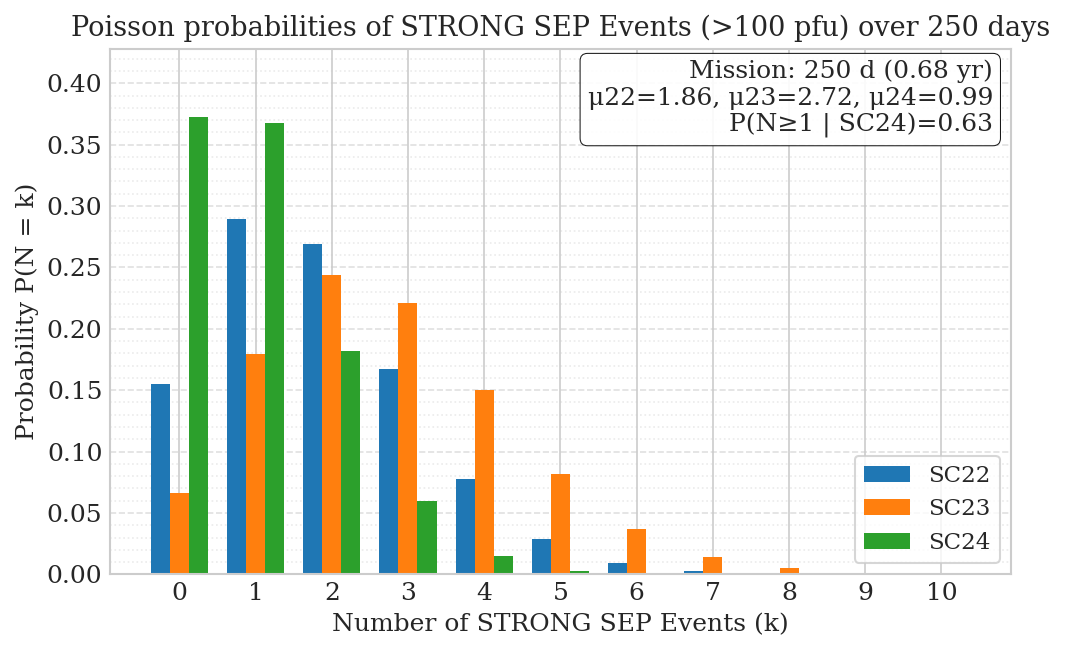

In [148]:
def poisson_distr(mu, k_max=10):
    ks = np.arange(0, k_max + 1)
    Ps = [poisson_pmf(mu,k) for k in ks]
    return ks, Ps

ks,Ps22 = poisson_distr(mu22, k_max=10)
ks,Ps23 = poisson_distr(mu23, k_max=10)
ks,Ps24 = poisson_distr(mu24, k_max=10)

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.dpi': 150,
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'legend.fontsize': 11
})

fig, ax = plt.subplots(figsize=(7,4.5))

width = 0.25
ax.bar(ks - width, Ps22, width=width, label='SC22' )
ax.bar(ks,          Ps23, width=width, label='SC23')
ax.bar(ks + width,  Ps24, width=width, label='SC24')

ax.set_xlabel('Number of STRONG SEP Events (k)')
ax.set_ylabel('Probability P(N = k)')
ax.set_title('Poisson probabilities of STRONG SEP Events (>100 pfu) over 250 days')

ax.set_xticks(ks)
ax.set_ylim(0, max(max(Ps22), max(Ps23), max(Ps24)) * 1.15)

# Grid per stile "paper-like"
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)
ax.grid(True, which='minor', axis='y', linestyle=':', alpha=0.4)
ax.minorticks_on()

summary = (
    f"Mission: {T_mission_days} d ({T_mission_years:.2f} yr)\n"
    f"μ22={mu22:.2f}, μ23={mu23:.2f}, μ24={mu24:.2f}\n"
    f"P(N≥1 | SC24)={P_ge_1:.2f}"
)
ax.text(0.98, 0.98, summary, transform=ax.transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, lw=0.5))

ax.legend(frameon=True)
plt.tight_layout()
plt.show()






# Scegliere quali eventi usare 

 1. MAJOR SEP EVENT se (noaa-sep_flag == 1) 
 ovvero quelli che superano la soglia definita dal NOAA swpc 

In [158]:
major = df[df['noaa-sep_flag'] == 1].copy()

print("Eventi totali nel catalogo GSEP: ", len(df))
print("Eventi MAJOR SEP (>10pfu): ", len(major))



Eventi totali nel catalogo GSEP:  433
Eventi MAJOR SEP (>10pfu):  227


In [159]:
# Suddivisione in cicli solari ù
# Notare che il catalogo arriva solo fino al 2017 quindi il SC24 è parziale 

SC22_start = datetime(1986, 9, 1)
SC22_end = datetime(1996, 8, 1)

SC23_start = SC22_end
SC23_end = datetime(2008, 12, 1)

SC24_start = SC23_end
SC24_end = datetime(2019, 12, 31)


def in_range(t, start, end):
    return (t >= start) & (t < end)


MAJOR_SC22 = major[in_range(major['timestamp'], SC22_start, SC22_end)]
MAJOR_SC23 = major[in_range(major['timestamp'], SC23_start, SC23_end)]
MAJOR_SC24 = major[in_range(major['timestamp'], SC24_start, SC24_end)]

print(len(MAJOR_SC22), len(MAJOR_SC23), len(MAJOR_SC24))

71 106 46


In [160]:
# DUrata dei cicli solari in anni   

def years_diff(start, end):
    return (end - start).days / 365.25

T22 = years_diff(SC22_start, SC22_end)
T23 = years_diff(SC23_start, SC23_end)
T24 = years_diff(SC24_start, SC24_end)

print(T22, T23, T24)

9.91649555099247 12.334017796030116 11.080082135523615


In [161]:
# CALCOLO TASSO EVENTI PER ANNO LAMBDA


lambda22 = len(MAJOR_SC22) / T22
lambda23 = len(MAJOR_SC23) / T23
lambda24 = len(MAJOR_SC24) / T24
print("Lambda22: ", lambda22)
print("Lambda23: ", lambda23)
print("Lambda24: ", lambda24)




Lambda22:  7.159787410270569
Lambda23:  8.594117647058823
Lambda24:  4.151593773165307


“Poiché il numero di SEP osservati in ciascun ciclo solare è finito, la stima del tasso medio λ presenta una incertezza statistica. Assumendo una statistica Poissoniana sul conteggio osservato, la deviazione standard è:

$$
\sigma_\lambda = \sqrt{N}/T
$$

dove N è il numero di eventi osservati in un intervallo di tempo T. Questa incertezza può essere usata per calcolare intervalli di confidenza sul tasso medio λ.”
	​


In [162]:
# Intervalli di confidenza per lambda 

def poisson_ci(count, T):
    lam = count / T
    sigma = np.sqrt(count) / T
    lower = lam - sigma
    upper = lam + sigma
    return lam, lower, upper


for label, df_tmp, T in [
    ("SC22", MAJOR_SC22, T22),
    ("SC23", MAJOR_SC23, T23),
    ("SC24", MAJOR_SC24, T24)]:

    lam , low, high = poisson_ci(len(df_tmp), T)

print("Stima tassi Poissoniani per Major SEP events (>10 pfu)\n")
for label, df_tmp, T in [
    ("Solar Cycle 22", MAJOR_SC22, T22),
    ("Solar Cycle 23", MAJOR_SC23, T23),
    ("Solar Cycle 24", MAJOR_SC24, T24)]:

    lam, low, high = poisson_ci(len(df_tmp), T)
    err = high - lam

    print(f"{label}:  λ = {lam:4.2f} ± {err:4.2f} eventi/anno  "
          f"(N={len(df_tmp)}, T={T:.1f} yr)")



Stima tassi Poissoniani per Major SEP events (>10 pfu)

Solar Cycle 22:  λ = 7.16 ± 0.85 eventi/anno  (N=71, T=9.9 yr)
Solar Cycle 23:  λ = 8.59 ± 0.83 eventi/anno  (N=106, T=12.3 yr)
Solar Cycle 24:  λ = 4.15 ± 0.61 eventi/anno  (N=46, T=11.1 yr)


In [164]:
# PARAMETRO MU PER DISTRUBUIZIONE DI POISSON
# Durata missione
T_mission_days = 250 
T_mission_years = T_mission_days / 365.25

mu22 = lambda22 * T_mission_years
mu23 = lambda23 * T_mission_years
mu24 = lambda24 * T_mission_years

# Incertezze su μ: σ_μ = (sqrt(N)/T) * T_mission_years
N22, N23, N24 = len(MAJOR_SC22), len(MAJOR_SC23), len(MAJOR_SC24)
sigma_mu22 = (math.sqrt(N22) / T22) * T_mission_years
sigma_mu23 = (math.sqrt(N23) / T23) * T_mission_years
sigma_mu24 = (math.sqrt(N24) / T24) * T_mission_years

print("Mu22: ", mu22, " ± ", sigma_mu22)
print("Mu23: ", mu23, " ± ", sigma_mu23)
print("Mu24: ", mu24, " ± ", sigma_mu24)


Mu22:  4.9006073992269465  ±  0.5815950975411622
Mu23:  5.88235294117647  ±  0.5713446249160378
Mu24:  2.8416110699283412  ±  0.41897269478164484


In [165]:
# Distribuzione di Poisson per MAJOR SEP EVENTS 

def poisson_pmf(mu,k):
    return (mu**k * np.exp(-mu)) / math.factorial(k)

def poisson_cdf(mu):
    # P( N >= 1 ) = 1 - P(N=0)
    return 1 - poisson_pmf(mu, 0)

for label , mu in [("SC22", mu22), ("SC23", mu23), ("SC24", mu24)]:
    P0 = math.exp(-mu)
    P_ge_1 = 1 - P0

    # in percentuali 
    print(f"{label}: mu = {mu:.3f}, {label}: P(N=0) = {P0*100:.2f}%, P(N>=1) = {P_ge_1*100:.2f}%")
    

SC22: mu = 4.901, SC22: P(N=0) = 0.74%, P(N>=1) = 99.26%
SC23: mu = 5.882, SC23: P(N=0) = 0.28%, P(N>=1) = 99.72%
SC24: mu = 2.842, SC24: P(N=0) = 5.83%, P(N>=1) = 94.17%


## Probabilità di almeno N eventi (N≥3, N≥5)

In [166]:
def P_at_least(mu, k):
    return 1 - sum(poisson_pmf(mu, i) for i in range(k))

for k in [1,3,5,6]:
    print(f"SC24: P(N≥{k}) = {P_at_least(mu24, k):.3f}")


for k in [1,3,5,6]:
    print(f"SC23: P(N≥{k}) = {P_at_least(mu23, k):.3f}")


for k in [1,3,5,6]:
    print(f"SC22: P(N≥{k}) = {P_at_least(mu22, k):.3f}")


SC24: P(N≥1) = 0.942
SC24: P(N≥3) = 0.540
SC24: P(N≥5) = 0.159
SC24: P(N≥6) = 0.069
SC23: P(N≥1) = 0.997
SC23: P(N≥3) = 0.933
SC23: P(N≥5) = 0.699
SC23: P(N≥6) = 0.535
SC22: P(N≥1) = 0.993
SC22: P(N≥3) = 0.867
SC22: P(N≥5) = 0.542
SC22: P(N≥6) = 0.367


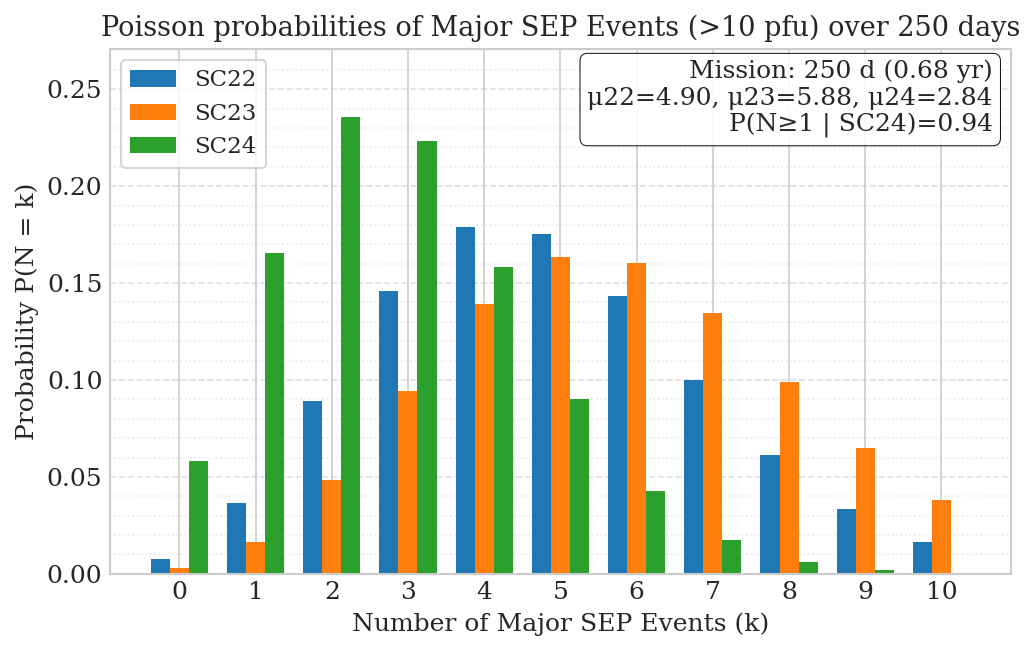

In [167]:
def poisson_distr(mu, k_max=10):
    ks = np.arange(0, k_max + 1)
    Ps = [poisson_pmf(mu,k) for k in ks]
    return ks, Ps

ks,Ps22 = poisson_distr(mu22, k_max=10)
ks,Ps23 = poisson_distr(mu23, k_max=10)
ks,Ps24 = poisson_distr(mu24, k_max=10)

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.dpi': 150,
    'font.size': 12,
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'legend.fontsize': 11
})

fig, ax = plt.subplots(figsize=(7,4.5))

width = 0.25
ax.bar(ks - width, Ps22, width=width, label='SC22' )
ax.bar(ks,          Ps23, width=width, label='SC23')
ax.bar(ks + width,  Ps24, width=width, label='SC24')

ax.set_xlabel('Number of Major SEP Events (k)')
ax.set_ylabel('Probability P(N = k)')
ax.set_title('Poisson probabilities of Major SEP Events (>10 pfu) over 250 days')

ax.set_xticks(ks)
ax.set_ylim(0, max(max(Ps22), max(Ps23), max(Ps24)) * 1.15)

# Grid per stile "paper-like"
ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)
ax.grid(True, which='minor', axis='y', linestyle=':', alpha=0.4)
ax.minorticks_on()

summary = (
    f"Mission: {T_mission_days} d ({T_mission_years:.2f} yr)\n"
    f"μ22={mu22:.2f}, μ23={mu23:.2f}, μ24={mu24:.2f}\n"
    f"P(N≥1 | SC24)={P_ge_1:.2f}"
)
ax.text(0.98, 0.98, summary, transform=ax.transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, lw=0.5))

ax.legend(frameon=True)
plt.tight_layout()
plt.show()






# Stessa analisi ma di tutti i SEP events 433 nel catalogo anche quelli sotto soglia NOAA 10 pfu

Eventi totali SEP nel catalogo GSEP:  433
163 160 110
Lambda22 all SEP:  15.540524667188723
Lambda23 all SEP:  12.972253052164262
Lambda24 all SEP:  9.927724240177909
Mu22 all SEP:  10.63690942312712
Mu23 all SEP:  8.879023307436182
Mu24 all SEP:  6.795156906350383
SC22 all SEP: mu = 10.637, SC22: P(N=0) = 0.00%, P(N>=1) = 100.00%
SC23 all SEP: mu = 8.879, SC23: P(N=0) = 0.01%, P(N>=1) = 99.99%
SC24 all SEP: mu = 6.795, SC24: P(N=0) = 0.11%, P(N>=1) = 99.89%


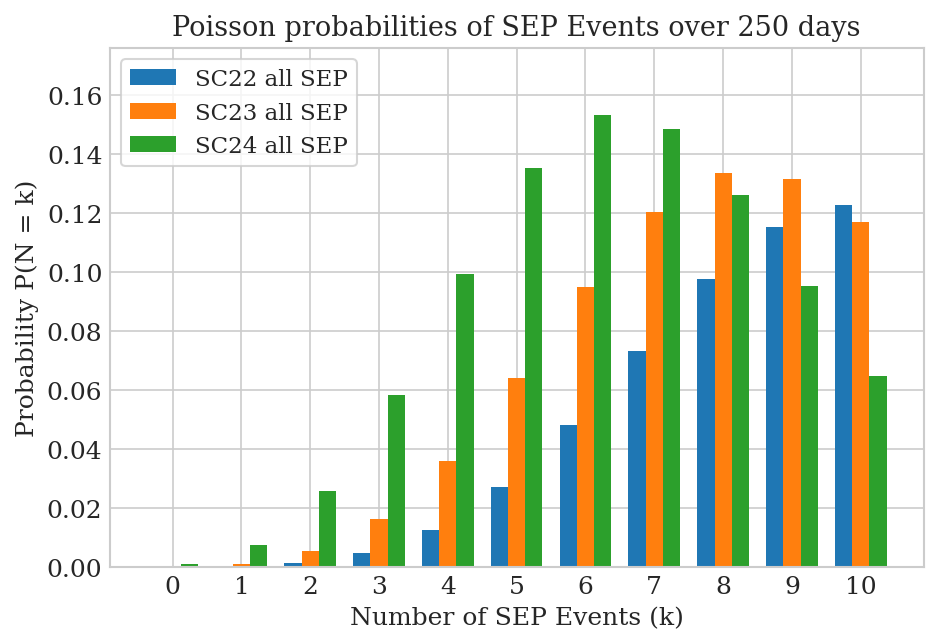

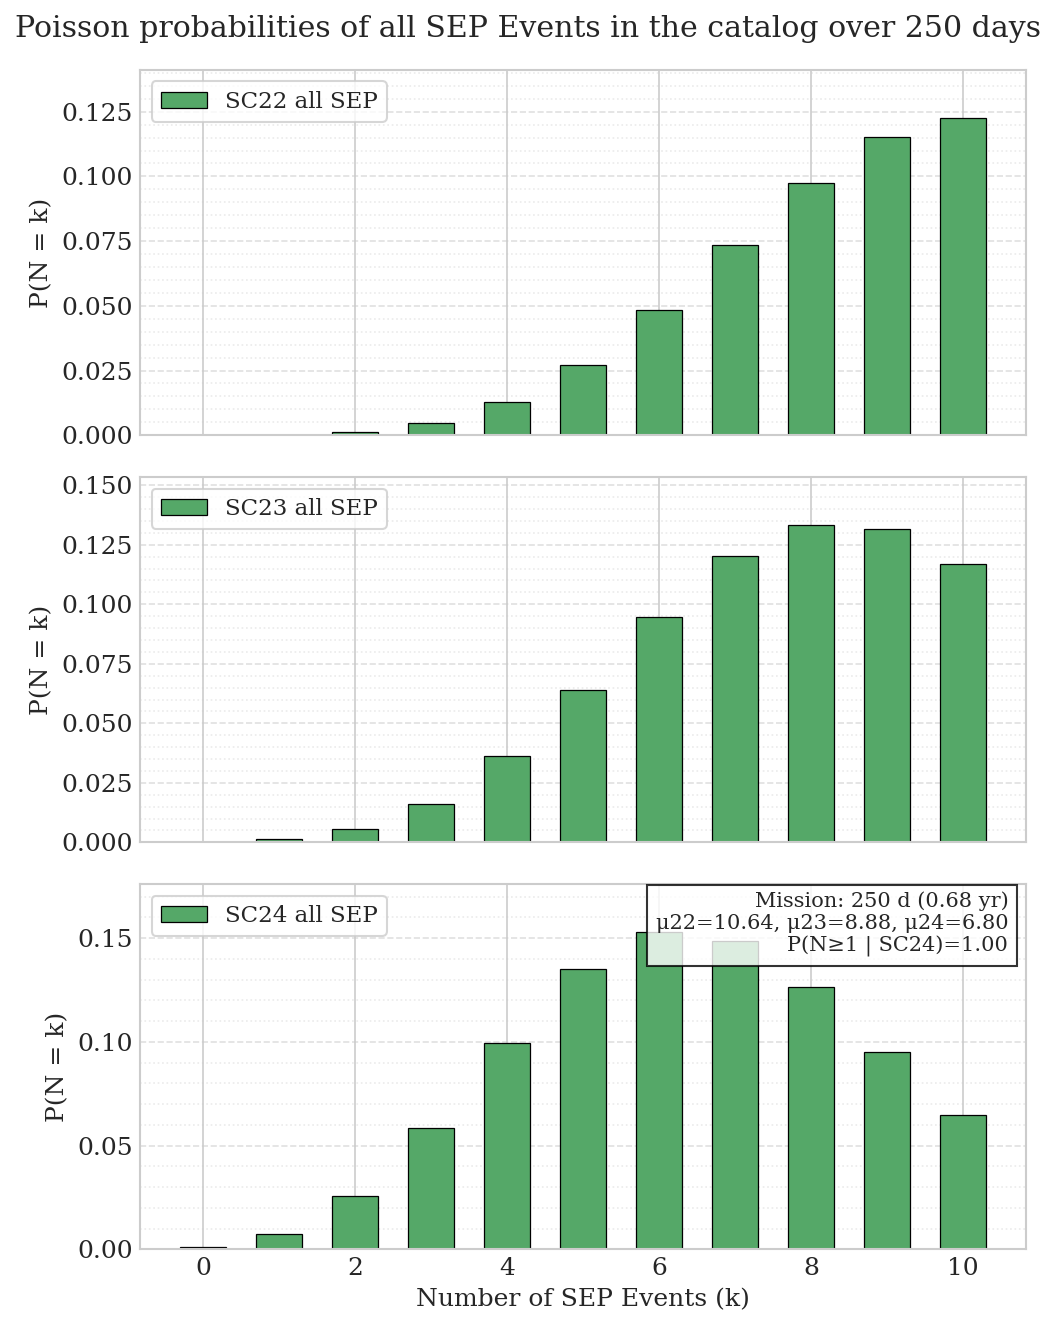

In [102]:
# Stessa analisi ma di tutti i SEP events 433 nel catalogo anche quelli sotto soglia NOAA 10 pfu
all_sep = df.copy()
print("Eventi totali SEP nel catalogo GSEP: ", len(all_sep))
# Suddivisione in cicli solari ù
ALLSEP_SC22 = all_sep[in_range(all_sep['timestamp'], SC22_start, SC22_end)]
ALLSEP_SC23 = all_sep[in_range(all_sep['timestamp'], SC23_start, SC23_end)]
ALLSEP_SC24 = all_sep[in_range(all_sep['timestamp'], SC24_start, SC24_end)]
print(len(ALLSEP_SC22), len(ALLSEP_SC23), len(ALLSEP_SC24))
lambda22_all = len(ALLSEP_SC22) / T22
print("Lambda22 all SEP: ", lambda22_all)
lambda23_all = len(ALLSEP_SC23) / T23
print("Lambda23 all SEP: ", lambda23_all)
lambda24_all = len(ALLSEP_SC24) / T24
print("Lambda24 all SEP: ", lambda24_all)
mu22_all = lambda22_all * T_mission_years
mu23_all = lambda23_all * T_mission_years
mu24_all = lambda24_all * T_mission_years
print("Mu22 all SEP: ", mu22_all)
print("Mu23 all SEP: ", mu23_all)
print("Mu24 all SEP: ", mu24_all)
for label , mu in [("SC22", mu22_all), ("SC23", mu23_all), ("SC24", mu24_all)]:
    P0 = math.exp(-mu)
    P_ge_1 = 1 - P0

    # in percentuali 
    print(f"{label} all SEP: mu = {mu:.3f}, {label}: P(N=0) = {P0*100:.2f}%, P(N>=1) = {P_ge_1*100:.2f}%")
ks,Ps22_all = poisson_distr(mu22_all, k_max=10)
ks,Ps23_all = poisson_distr(mu23_all, k_max=10)
ks,Ps24_all = poisson_distr(mu24_all, k_max=10)
fig, ax = plt.subplots(figsize=(7,4.5))
width = 0.25
ax.bar(ks - width, Ps22_all, width=width, label='SC22 all SEP')
ax.bar(ks,          Ps23_all, width=width, label='SC23 all SEP')
ax.bar(ks + width,  Ps24_all, width=width, label='SC24 all SEP')
ax.set_xlabel('Number of SEP Events (k)')
ax.set_ylabel('Probability P(N = k)')
ax.set_title('Poisson probabilities of SEP Events over 250 days')
ax.set_xticks(ks)
ax.set_ylim(0, max(max(Ps22_all), max(Ps23_all), max(Ps24_all)) * 1.15)
# Tre pannelli separati per SC22, SC23, SC24 (stile paper-like)
fig, axs = plt.subplots(3, 1, figsize=(7, 9), sharex=True)
series_all = [
    ("SC22 all SEP", Ps22_all),
    ("SC23 all SEP", Ps23_all),
    ("SC24 all SEP", Ps24_all),
]
for ax_i, (label_i, Ps_i) in zip(axs, series_all):
    ax_i.bar(ks, Ps_i, width=0.6, color='#55A868', label=label_i)

    # Bordi sottili alle colonne
    for p in ax_i.patches:
        p.set_edgecolor('black')
        p.set_linewidth(0.6)

    # Grid "paper-like"
    ax_i.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)
    ax_i.grid(True, which='minor', axis='y', linestyle=':', alpha=0.4)
    ax_i.minorticks_on()

    ax_i.set_ylim(0, max(Ps_i) * 1.15)
    ax_i.legend(frameon=True)
axs[-1].set_xlabel('Number of SEP Events (k)')
for ax_i in axs:
    ax_i.set_ylabel('P(N = k)')
fig.suptitle('Poisson probabilities of all SEP Events in the catalog over 250 days', y=0.98)
# Box riassuntivo nel pannello SC24
summary_all = (
    f"Mission: {T_mission_days} d ({T_mission_years:.2f} yr)\n"
    f"μ22={mu22_all:.2f}, μ23={mu23_all:.2f}, μ24={mu24_all:.2f}\n"
    f"P(N≥1 | SC24)={P_ge_1:.2f}"
)
axs[2].text(0.98, 0.98, summary_all, transform=axs[2].transAxes,
            ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
plt.tight_layout()
ax.legend(frameon=True)
plt.tight_layout()
plt.show()


Totale major SEP (>10 pfu):  227
Totale strong SEP (>100 pfu):  94
Frazione (%):  41.409691629955944


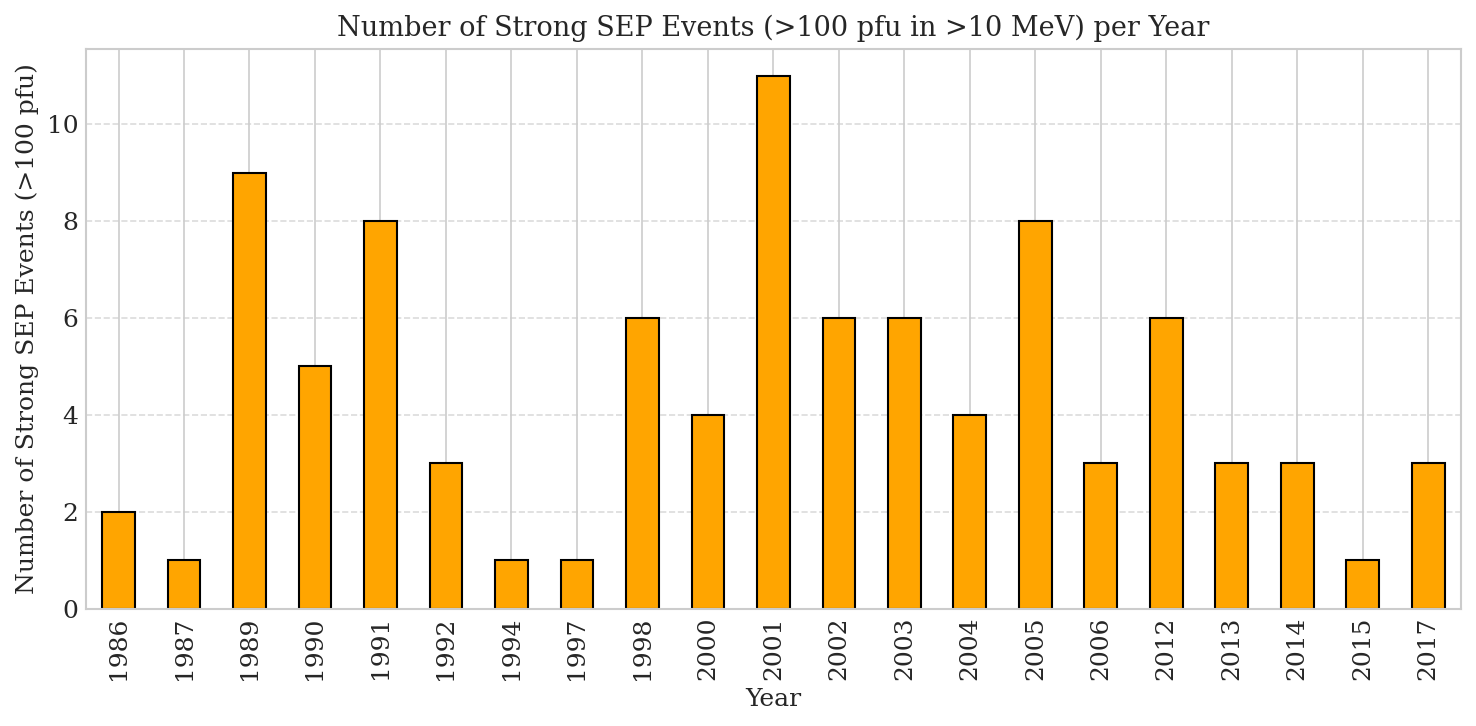

In [150]:
# Eventi MOLTO INTENSI >100 pfu  
threshold_intense = 100  # pfu

strong_SEP = df[(df["noaa-sep_flag"] == 1) & (df["noaa_pf10MeV"] >= threshold_intense)].copy()

print("Totale major SEP (>10 pfu): ", len(df[df["noaa-sep_flag"] == 1]))
print("Totale strong SEP (>100 pfu): ", len(strong_SEP))
print("Frazione (%): ", (len(strong_SEP) / len(df[df["noaa-sep_flag"] == 1])) * 100)


# per anno 

events_per_year = strong_SEP.groupby('year').size()

events_per_year.plot(kind='bar', figsize=(10,5), color='orange', edgecolor='black')
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Strong SEP Events (>100 pfu)')
plt.title('Number of Strong SEP Events (>100 pfu in >10 MeV) per Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



SC22: N=29, λ_strong=2.765 ± 0.513 /yr, μ_strong=1.892 ± 0.351 (per missione)
SC23: N=49, λ_strong=3.973 ± 0.568 /yr, μ_strong=2.719 ± 0.388 (per missione)
SC24: N=16, λ_strong=1.444 ± 0.361 /yr, μ_strong=0.988 ± 0.247 (per missione)
SC22: N=29, λ_strong=2.765 ± 0.513 /yr, μ_strong=1.892 ± 0.351 (per missione)


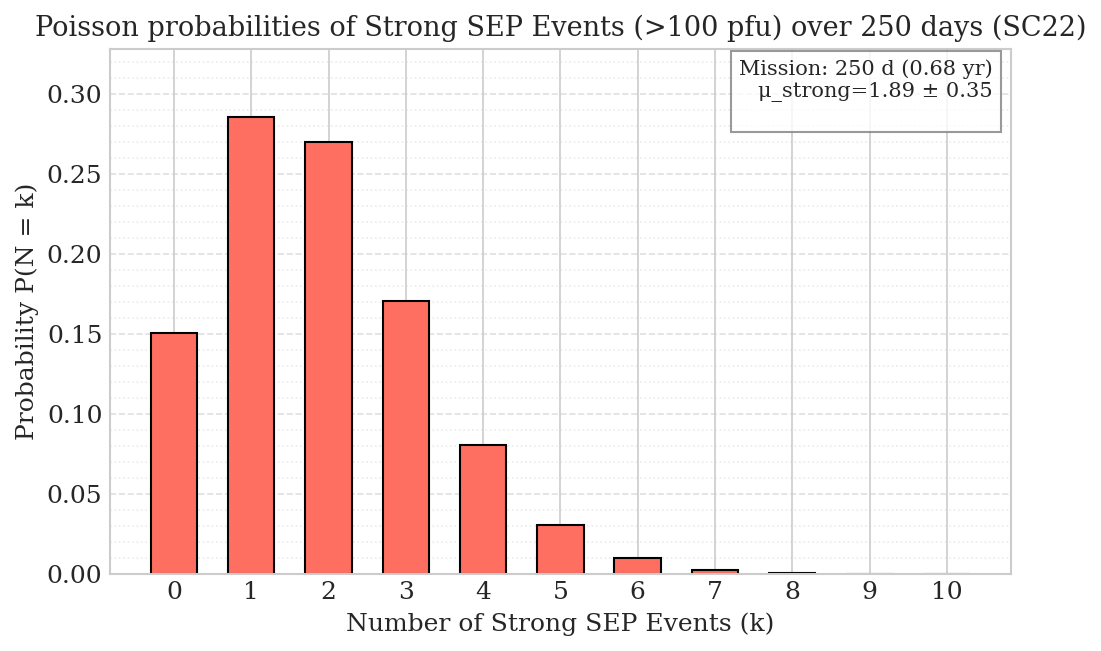

SC23: N=49, λ_strong=3.973 ± 0.568 /yr, μ_strong=2.719 ± 0.388 (per missione)


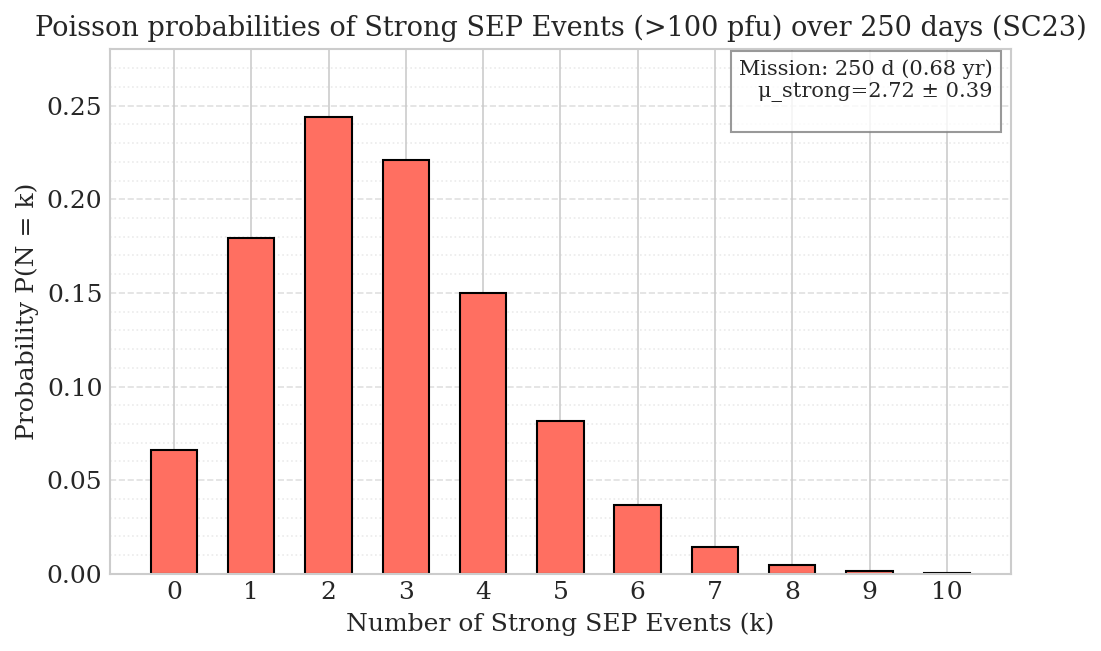

SC24: N=16, λ_strong=1.444 ± 0.361 /yr, μ_strong=0.988 ± 0.247 (per missione)


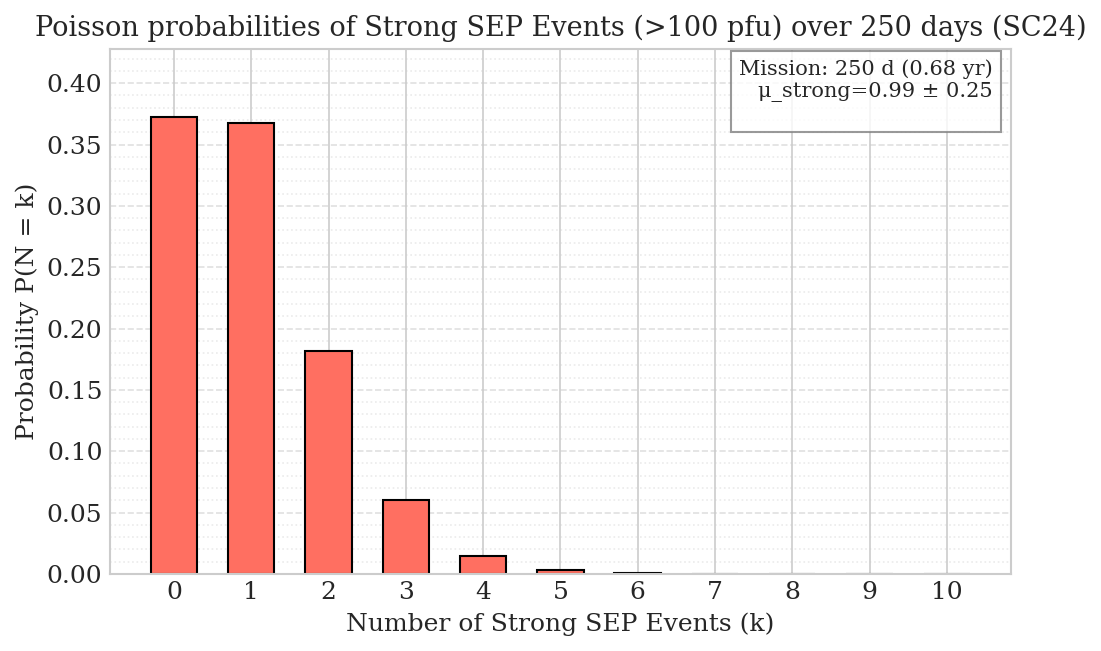

In [ ]:
# Aggiunta incertezze 1σ sul tasso (Poisson): σ_λ = sqrt(N)/T, propagate su μ: σ_μ = σ_λ * T_mission_years

# Usa i dataset già definiti in altre celle se presenti; altrimenti creali senza sovrascrivere.
if 'MAJOR_STRONG_SC22' not in globals():
    MAJOR_STRONG_SC22 = strong_SEP[in_range(strong_SEP['timestamp'], SC22_start, SC22_end)]
if 'MAJOR_STRONG_SC23' not in globals():
    MAJOR_STRONG_SC23 = strong_SEP[in_range(strong_SEP['timestamp'], SC23_start, SC23_end)]
if 'MAJOR_STRONG_SC24' not in globals():
    MAJOR_STRONG_SC24 = strong_SEP[in_range(strong_SEP['timestamp'], SC24_start, SC24_end)]

def rate_with_uncertainty(df_cycle, T):
    N = len(df_cycle)
    lam = N / T
    sigma_lam = math.sqrt(N) / T
    mu = lam * T_mission_years
    sigma_mu = sigma_lam * T_mission_years
    return N, lam, sigma_lam, mu, sigma_mu

for label, df_tmp, T in [
    ("SC22", MAJOR_STRONG_SC22, T22),
    ("SC23", MAJOR_STRONG_SC23, T23),
    ("SC24", MAJOR_STRONG_SC24, T24),
]:
    N, lam, sigma_lam, mu, sigma_mu = rate_with_uncertainty(df_tmp, T)
    print(f"{label}: N={N}, λ_strong={lam:.3f} ± {sigma_lam:.3f} /yr, μ_strong={mu:.3f} ± {sigma_mu:.3f} (per missione)")

# Plot risultati distribuzione POISSON per major >100 pfu 
for label, df_tmp, T in [
    ("SC22", MAJOR_STRONG_SC22, T22),
    ("SC23", MAJOR_STRONG_SC23, T23),
    ("SC24", MAJOR_STRONG_SC24, T24),
]:
    N, lam, sigma_lam, mu, sigma_mu = rate_with_uncertainty(df_tmp, T)
    print(f"{label}: N={N}, λ_strong={lam:.3f} ± {sigma_lam:.3f} /yr, μ_strong={mu:.3f} ± {sigma_mu:.3f} (per missione)")
    ks, Ps = poisson_distr(mu, k_max=10)
    fig, ax = plt.subplots(figsize=(7,4.5))
    ax.bar(ks, Ps, width=0.6, color='#FF6F61', edgecolor='black')
    ax.set_xlabel('Number of Strong SEP Events (k)')
    ax.set_ylabel('Probability P(N = k)')
    ax.set_title(f'Poisson probabilities of Strong SEP Events (>100 pfu) over {T_mission_days} days ({label})')
    ax.set_xticks(ks)
    ax.set_ylim(0, max(Ps) * 1.15)
    # Grid "paper-like"
    ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)
    ax.grid(True, which='minor', axis='y', linestyle=':', alpha=0.4)
    ax.minorticks_on()
    # Box riassuntivo
    summary_strong = (
        f"Mission: {T_mission_days} d ({T_mission_years:.2f} yr)\n"
        f"μ_strong={mu:.2f} ± {sigma_mu:.2f}\n"
    )
    ax.text(0.98, 0.98, summary_strong, transform=ax.transAxes,
            ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    plt.tight_layout()
    plt.show()



λ_max (anni=9): 14.444 ± 1.267 eventi/anno
λ_min (anni=3): 2.333 ± 0.882 eventi/anno
μ_max per missione 250gg: 9.887
μ_min per missione 250gg: 1.597
Solar Max (SC22-24): mu = 9.887, P(N=0) = 0.01%, P(N>=1) = 99.99%
Solar Min (SC22-24): mu = 1.597, P(N=0) = 20.25%, P(N>=1) = 79.75%


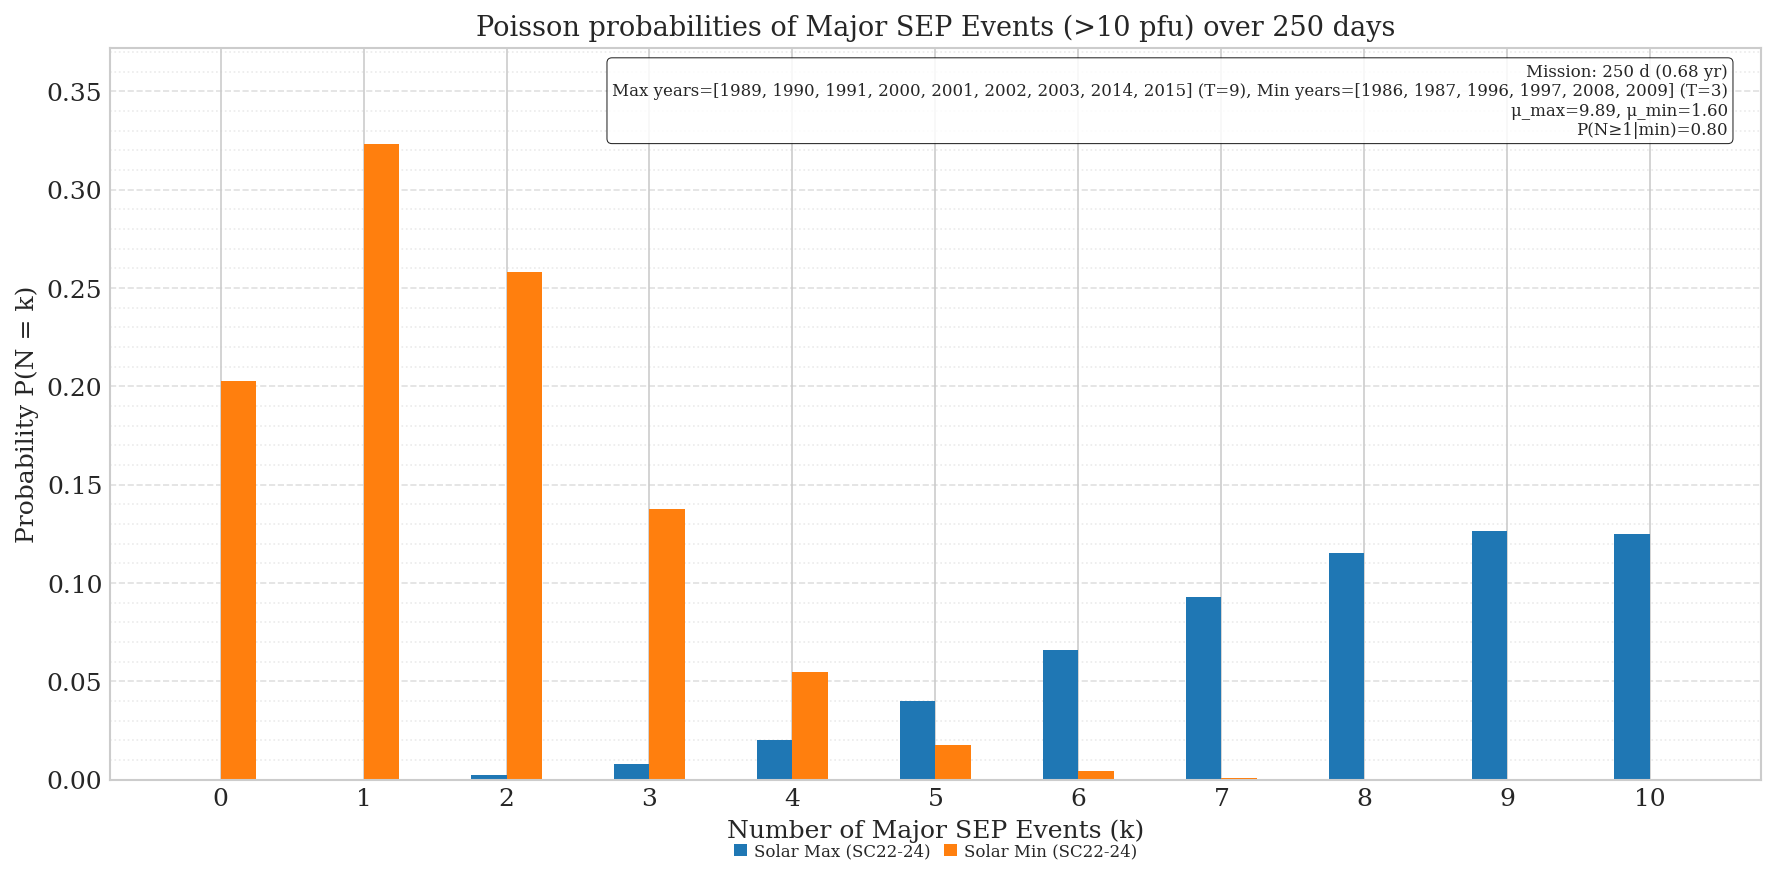

In [168]:
# Analisi probabilistica considerando i massimi e minimi dei cicli SC22, SC23, SC24
# Usando il range più lungo possibile nel catalogo (unione degli anni attorno ai massimi/minimi)

# Anni di massimo attività (circa) per SC22, SC23, SC24
max_years = {1989, 1990, 1991, 2000, 2001, 2002, 2003, 2014, 2015}
# Anni di minimo attività (circa) per SC22, SC23, SC24
min_years = {1986, 1987, 1996, 1997, 2008, 2009}

max_phase = df[df["year"].isin(max_years)].copy()
min_phase = df[df["year"].isin(min_years)].copy()

maj_max = max_phase[max_phase['noaa-sep_flag'] == 1].copy()
maj_min = min_phase[min_phase['noaa-sep_flag'] == 1].copy()

# Durata totale approssimata (in anni) come numero di anni coperti nei set
T_max = max_phase["year"].nunique()
T_min = min_phase["year"].nunique()

lambda_max = len(maj_max) / T_max if T_max > 0 else 0.0
lambda_min = len(maj_min) / T_min if T_min > 0 else 0.0

#incertezze su lambda 
sigma_lambda_max = math.sqrt(len(maj_max)) / T_max if T_max > 0 else 0.0
sigma_lambda_min = math.sqrt(len(maj_min)) / T_min if T_min > 0 else 0.0

print(f"λ_max (anni={T_max}): {lambda_max:.3f} ± {sigma_lambda_max:.3f} eventi/anno")
print(f"λ_min (anni={T_min}): {lambda_min:.3f} ± {sigma_lambda_min:.3f} eventi/anno")

# Per missione di 250 giorni

mu_max = lambda_max * T_mission_years
mu_min = lambda_min * T_mission_years
print(f"μ_max per missione 250gg: {mu_max:.3f}")
print(f"μ_min per missione 250gg: {mu_min:.3f}")

for phase, mu in [("Solar Max (SC22-24)", mu_max), ("Solar Min (SC22-24)", mu_min)]:
    P0 = math.exp(-mu)
    P_ge_1 = 1 - P0
    print(f"{phase}: mu = {mu:.3f}, P(N=0) = {P0*100:.2f}%, P(N>=1) = {P_ge_1*100:.2f}%")

ks, Ps_max = poisson_distr(mu_max, k_max=10)
ks, Ps_min = poisson_distr(mu_min, k_max=10)

fig, ax = plt.subplots(figsize=(12,6))
width = 0.25
ax.bar(ks - width/2, Ps_max, width=width, label='Solar Max (SC22-24)')
ax.bar(ks + width/2, Ps_min, width=width, label='Solar Min (SC22-24)')

ax.set_xlabel('Number of Major SEP Events (k)')
ax.set_ylabel('Probability P(N = k)')
ax.set_title('Poisson probabilities of Major SEP Events (>10 pfu) over 250 days')
ax.set_xticks(ks)
ax.set_ylim(0, max(max(Ps_max), max(Ps_min)) * 1.15)

ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.6)
ax.grid(True, which='minor', axis='y', linestyle=':', alpha=0.4)
ax.minorticks_on()

summary_phase = (
    f"Mission: {T_mission_days} d ({T_mission_years:.2f} yr)\n"
    f"Max years={sorted(max_years)} (T={T_max}), Min years={sorted(min_years)} (T={T_min})\n"
    f"μ_max={mu_max:.2f}, μ_min={mu_min:.2f}\n"
    f"P(N≥1|min)={1 - math.exp(-mu_min):.2f}"
)
# Box riassuntivo più compatto
ax.text(0.98, 0.98, summary_phase, transform=ax.transAxes,
    ha='right', va='top',
    fontsize=8,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.85, lw=0.5))

# Legenda fuori dal grafico, molto compatta
legend = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.07),
    ncol=2,
    fontsize=8,
    frameon=False,
    handlelength=0.8,
    handletextpad=0.4,
    borderpad=0.2,
    columnspacing=0.8
)

plt.tight_layout()
plt.show()



=== Risultati Poisson per missione 250 giorni ===

Solar Max (SC22–24): μ = 9.89 ± 0.87
  P(N≥1) = 100.0%
  P(N≥3) = 99.7%
  P(N≥5) = 96.9%

Solar Min (SC22–24): μ = 1.60 ± 0.60
  P(N≥1) = 79.8%
  P(N≥3) = 21.6%
  P(N≥5) = 2.4%



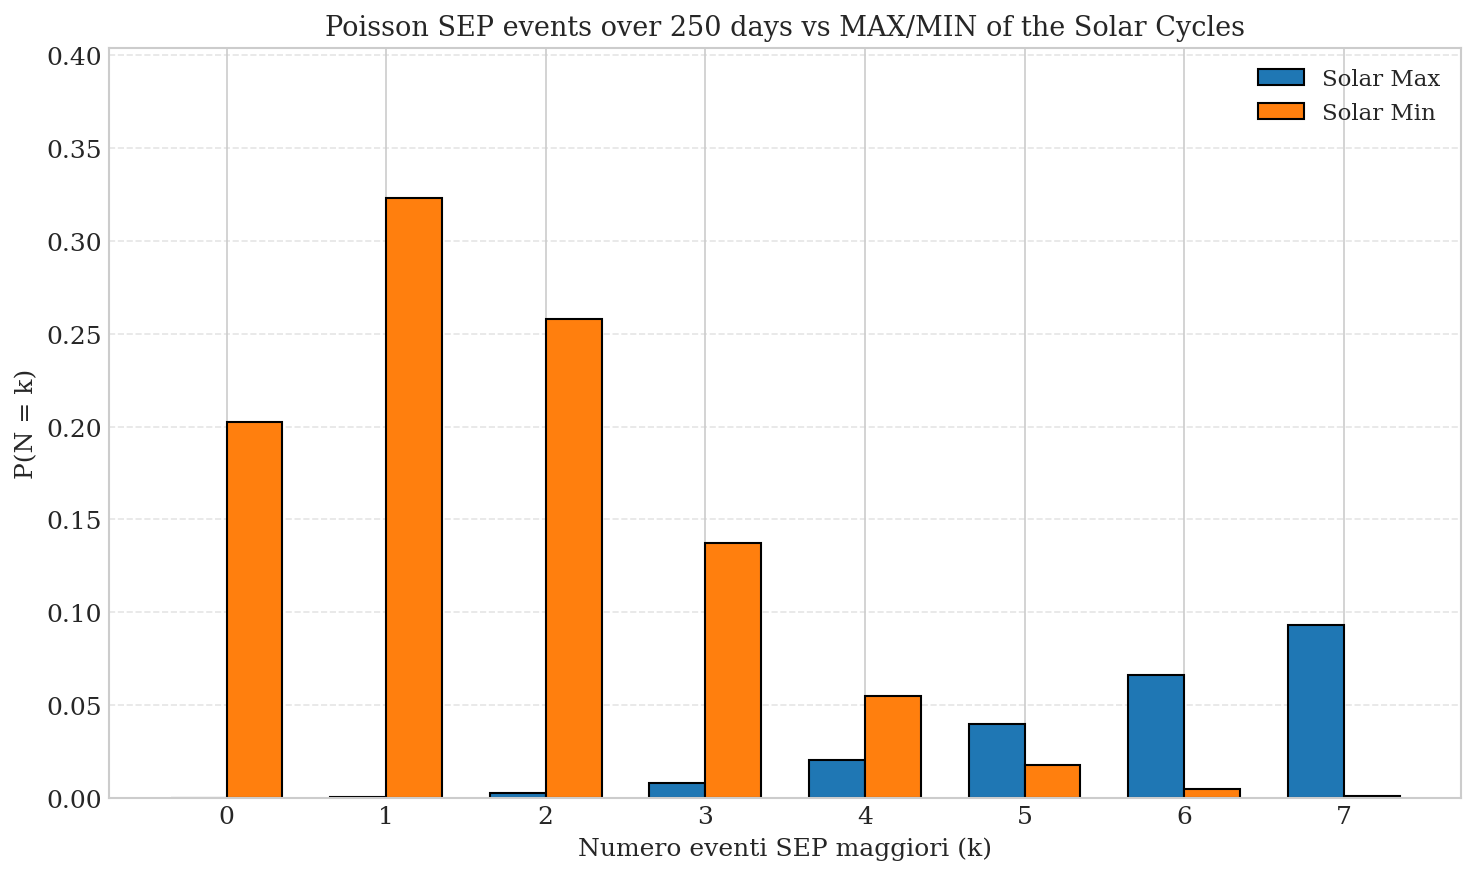

,Phase,Years,λ (evt/yr),μ,P(N≥1) %,P(N≥3) %,P(N≥5) %
0,Max,9,14.44 ± 1.27,9.89 ± 0.87,100.0,99.7,96.9
1,Min,3,2.33 ± 0.88,1.60 ± 0.60,79.8,21.6,2.4


In [169]:
# ============================
# Analisi Poisson per fasi Solar Max vs Solar Min (SC22–24)

import math
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd

# ============================

# Definizione delle fasi (anni attorno ai massimi e minimi solares)
max_years = {1989, 1990, 1991, 2000, 2001, 2002, 2003, 2014, 2015}
min_years = {1986, 1987, 1996, 1997, 2008, 2009}

max_phase = df[df["year"].isin(max_years)]
min_phase = df[df["year"].isin(min_years)]

# Eventi SEP maggiori
maj_max = max_phase[max_phase['noaa-sep_flag'] == 1]
maj_min = min_phase[min_phase['noaa-sep_flag'] == 1]

# Durata delle finestre temporali (anni distinti)
T_max = max_phase["year"].nunique()
T_min = min_phase["year"].nunique()

# Tassi Poisson
lambda_max = len(maj_max) / T_max
lambda_min = len(maj_min) / T_min

# Incertezze su λ: sigma(λ)=sqrt(N)/T
sigma_lambda_max = math.sqrt(len(maj_max)) / T_max
sigma_lambda_min = math.sqrt(len(maj_min)) / T_min

# Durata missione
mu_max = lambda_max * T_mission_years
mu_min = lambda_min * T_mission_years

# Propagazione incertezze μ: sigma(μ) = sigma(λ) * T
sigma_mu_max = sigma_lambda_max * T_mission_years
sigma_mu_min = sigma_lambda_min * T_mission_years

def poisson_tail(mu, k):
    return 1 - poisson.cdf(k - 1, mu)

def print_stats(label, mu, sigma):
    print(f"{label}: μ = {mu:.2f} ± {sigma:.2f}")
    print(f"  P(N≥1) = {poisson_tail(mu,1)*100:.1f}%")
    print(f"  P(N≥3) = {poisson_tail(mu,3)*100:.1f}%")
    print(f"  P(N≥5) = {poisson_tail(mu,5)*100:.1f}%\n")

print(f"\n=== Risultati Poisson per missione 250 giorni ===\n")
print_stats("Solar Max (SC22–24)", mu_max, sigma_mu_max)
print_stats("Solar Min (SC22–24)", mu_min, sigma_mu_min)

# ======================
# Grafico distribuzioni
# ======================
ks = np.arange(0, 8)

Ps_max = poisson.pmf(ks, mu_max)
Ps_min = poisson.pmf(ks, mu_min)

fig, ax = plt.subplots(figsize=(10,6))
width = 0.35

ax.bar(ks - width/2, Ps_max, width=width, label='Solar Max', color='#1f77b4',edgecolor='black')
ax.bar(ks + width/2, Ps_min, width=width, label='Solar Min', color='#ff7f0e',edgecolor='black')

ax.set_xlabel('Numero eventi SEP maggiori (k)')
ax.set_ylabel('P(N = k)')
ax.set_title('Poisson SEP events over 250 days vs MAX/MIN of the Solar Cycles')
ax.set_xticks(ks)
ax.set_ylim(0, max(Ps_max.max(), Ps_min.max()) * 1.25)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

# ======================
# Tabella riassuntiva
# ======================
summary = pd.DataFrame({
    "Phase": ["Max", "Min"],
    "Years": [T_max, T_min],
    "λ (evt/yr)": [f"{lambda_max:.2f} ± {sigma_lambda_max:.2f}",
                   f"{lambda_min:.2f} ± {sigma_lambda_min:.2f}"],
    "μ": [f"{mu_max:.2f} ± {sigma_mu_max:.2f}",
          f"{mu_min:.2f} ± {sigma_mu_min:.2f}"],
    "P(N≥1) %": [f"{poisson_tail(mu_max,1)*100:.1f}",
                 f"{poisson_tail(mu_min,1)*100:.1f}"],
    "P(N≥3) %": [f"{poisson_tail(mu_max,3)*100:.1f}",
                 f"{poisson_tail(mu_min,3)*100:.1f}"],
    "P(N≥5) %": [f"{poisson_tail(mu_max,5)*100:.1f}",
                 f"{poisson_tail(mu_min,5)*100:.1f}"],
})

display(summary)


In [170]:
# ===========================================================
# Confronto statistico Solar Max vs Solar Min
# Rate ratio + p-value test (Poisson)
# ===========================================================

from math import sqrt
from scipy.stats import norm

# Rate ratio
rate_ratio = lambda_max / lambda_min

# Incertezza sul ratio via propagazione logaritmica
sigma_rr = rate_ratio * sqrt((sigma_lambda_max/lambda_max)**2 +
                             (sigma_lambda_min/lambda_min)**2)

print(f"\n=== Confronto tassi Poisson ===")
print(f"Rate Ratio (Max/Min): {rate_ratio:.2f} ± {sigma_rr:.2f}")

# ============================
# Test statistico
# ============================
# z-score per confronto tra due tassi Poisson indipendenti
z_score = (lambda_max - lambda_min) / sqrt(sigma_lambda_max**2 + sigma_lambda_min**2)
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # test bilaterale

print(f"z-score = {z_score:.2f}")
print(f"p-value = {p_value:.3f}")

if p_value < 0.05:
    significance = " → differenza statisticamente significativa"
else:
    significance = " → nessuna evidenza statistica forte"

print(significance)



=== Confronto tassi Poisson ===
Rate Ratio (Max/Min): 6.19 ± 2.40
z-score = 7.85
p-value = 0.000
 → differenza statisticamente significativa


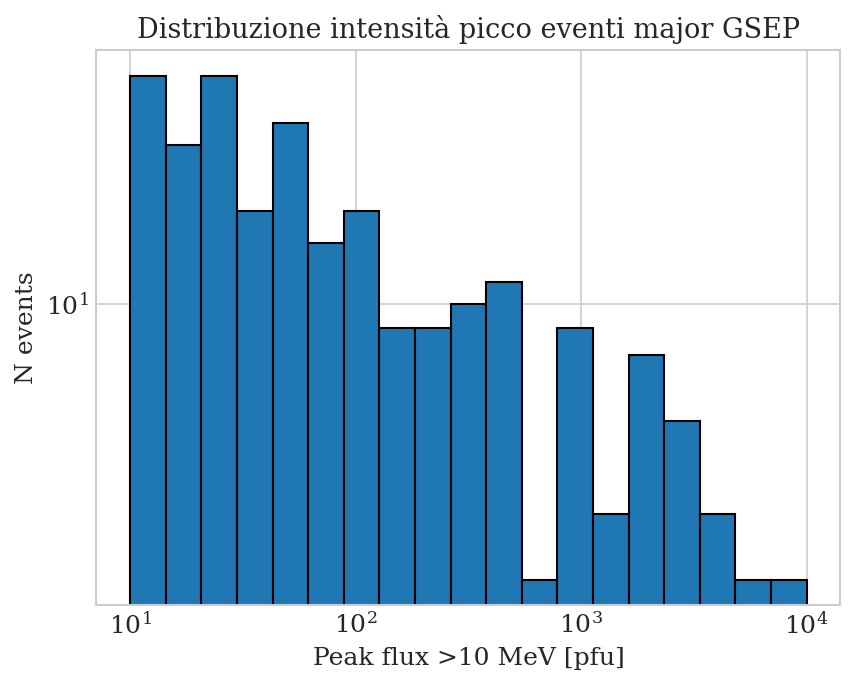

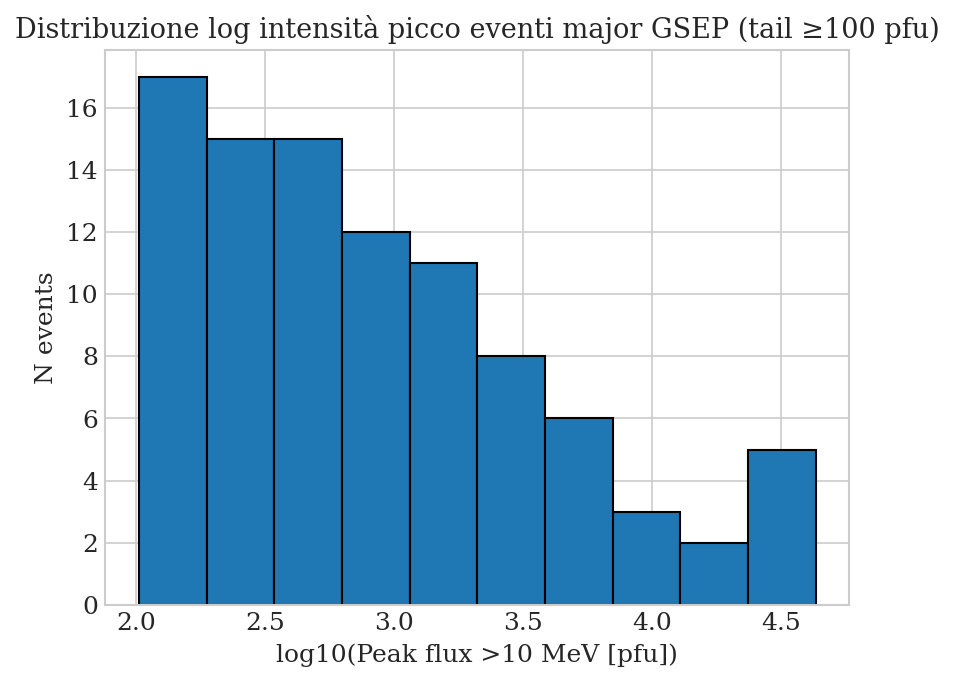

In [128]:
# Aggiungere L'intensità 

# Distribuzione della peak intensity per eventi major 

major_flux = major["noaa_pf10MeV"].dropna()  # in pfu

plt.figure()
plt.hist(major_flux, bins=np.logspace(np.log10(10), np.log10(1e4), 20), edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Peak flux >10 MeV [pfu]')
plt.ylabel('N events')
plt.title('Distribuzione intensità picco eventi major GSEP')

tail = major_flux[major_flux >= 100]
x = np.log10(tail.values)
# fit lineare log N vs log F se fai binning, o anche solo power-law su CDF
plt.figure()
plt.hist(x, bins=10, edgecolor='black')
plt.xlabel('log10(Peak flux >10 MeV [pfu])')
plt.ylabel('N events')
plt.title('Distribuzione log intensità picco eventi major GSEP (tail ≥100 pfu)')
plt.show()

